In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
def PolynomialRegression(degree = 2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [3]:
import numpy as np

In [4]:
def make_data(N,err=1.0,rseed = 1):
    # randomly simple data
    rng = np.random.RandomState(rseed)
    x = rng.rand(N,1) ** 2
    y = 10 - 1. / (x.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return x,y


In [5]:
x,y = make_data(40)
print(x)
print(y)

[[1.73907352e-01]
 [5.18867376e-01]
 [1.30815988e-08]
 [9.14049845e-02]
 [2.15372915e-02]
 [8.52641608e-03]
 [3.46928663e-02]
 [1.19412216e-01]
 [1.57424429e-01]
 [2.90323473e-01]
 [1.75724041e-01]
 [4.69525764e-01]
 [4.18007224e-02]
 [7.71090232e-01]
 [7.50080261e-04]
 [4.49526682e-01]
 [1.74143298e-01]
 [3.12134324e-01]
 [1.97084925e-02]
 [3.92442000e-02]
 [6.41191864e-01]
 [9.37530479e-01]
 [9.82347155e-02]
 [4.79310604e-01]
 [7.68057946e-01]
 [8.00321082e-01]
 [7.23251789e-03]
 [1.52527609e-03]
 [2.88423714e-02]
 [7.71134256e-01]
 [9.67209972e-03]
 [1.77331632e-01]
 [9.17552352e-01]
 [2.84265221e-01]
 [4.78693941e-01]
 [9.95501134e-02]
 [4.71283524e-01]
 [6.96600012e-01]
 [3.34461088e-04]
 [5.62716493e-01]]
[ 7.24998644  7.70041705 -0.12288892  3.83970623  1.50418461  1.31600899
  1.88404109  5.0456151   5.42819209  6.59281674  5.70193919  8.23148858
  1.8305394   9.086429    1.73425177  8.92229631  6.16043712  6.68597765
  0.8992155   4.51082693  8.70162943  8.39917725  5.14639037

[[-1.00000000e-01]
 [-9.75951904e-02]
 [-9.51903808e-02]
 [-9.27855711e-02]
 [-9.03807615e-02]
 [-8.79759519e-02]
 [-8.55711423e-02]
 [-8.31663327e-02]
 [-8.07615230e-02]
 [-7.83567134e-02]
 [-7.59519038e-02]
 [-7.35470942e-02]
 [-7.11422846e-02]
 [-6.87374749e-02]
 [-6.63326653e-02]
 [-6.39278557e-02]
 [-6.15230461e-02]
 [-5.91182365e-02]
 [-5.67134269e-02]
 [-5.43086172e-02]
 [-5.19038076e-02]
 [-4.94989980e-02]
 [-4.70941884e-02]
 [-4.46893788e-02]
 [-4.22845691e-02]
 [-3.98797595e-02]
 [-3.74749499e-02]
 [-3.50701403e-02]
 [-3.26653307e-02]
 [-3.02605210e-02]
 [-2.78557114e-02]
 [-2.54509018e-02]
 [-2.30460922e-02]
 [-2.06412826e-02]
 [-1.82364729e-02]
 [-1.58316633e-02]
 [-1.34268537e-02]
 [-1.10220441e-02]
 [-8.61723447e-03]
 [-6.21242485e-03]
 [-3.80761523e-03]
 [-1.40280561e-03]
 [ 1.00200401e-03]
 [ 3.40681363e-03]
 [ 5.81162325e-03]
 [ 8.21643287e-03]
 [ 1.06212425e-02]
 [ 1.30260521e-02]
 [ 1.54308617e-02]
 [ 1.78356713e-02]
 [ 2.02404810e-02]
 [ 2.26452906e-02]
 [ 2.5050100

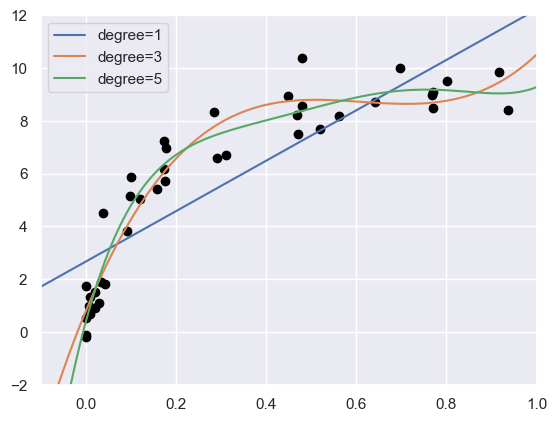

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

x_test = np.linspace(-0.1,1.1,500)[:,None]
print(x_test)

plt.scatter(x.ravel(),y,color ='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label ='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

Text(0, 0.5, 'score')

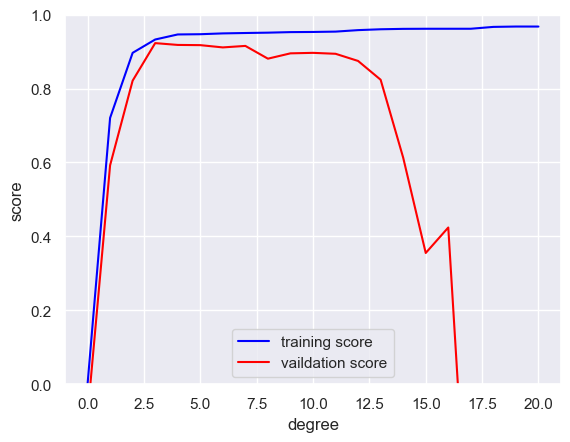

In [11]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
trainScore,valScore = validation_curve(PolynomialRegression(),x,y,param_name='polynomialfeatures__degree',param_range=degree,cv=7)
plt.plot(degree,np.median(trainScore,1),color = 'blue',label = 'training score')
plt.plot(degree,np.median(valScore,1),color = 'red',label = 'vaildation score')
plt.legend(loc = 'lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.04687651021505175, 0.9844070023112612, -0.7308177116555796, 10.902869392322714)


(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

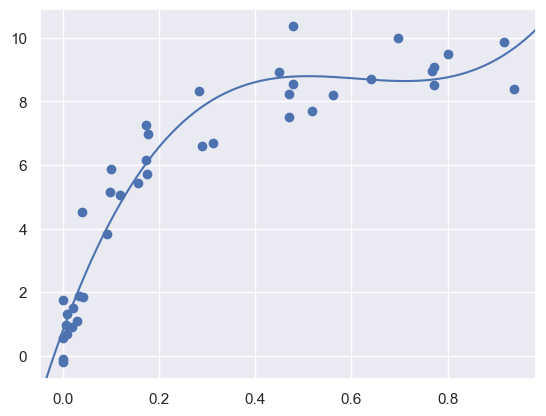

In [8]:
plt.scatter(x.ravel(),y)
lim = plt.axis()
print(lim)
y_test = PolynomialRegression(3).fit(x,y).predict(x_test)
plt.plot(x_test.ravel(),y_test)
plt.axis(lim)

# 學習曲線

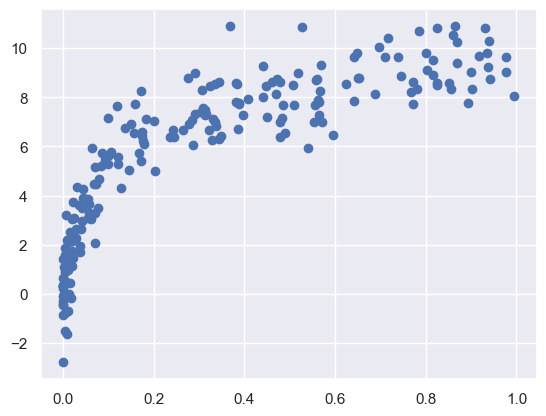

In [9]:
x2,y2 = make_data(200)
plt.scatter(x2.ravel(),y2)

Text(0, 0.5, 'score')

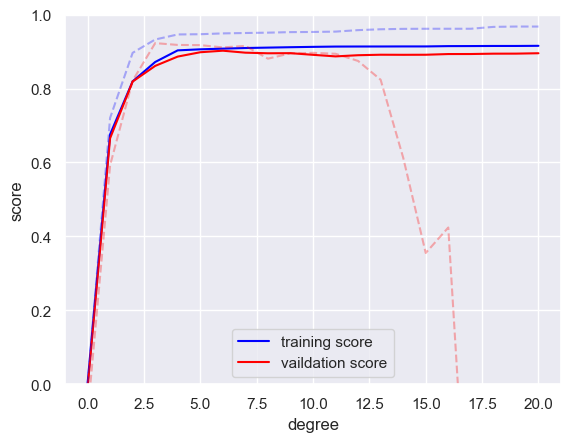

In [12]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
trainScore2,valScore2= validation_curve(PolynomialRegression(),x2,y2,param_name='polynomialfeatures__degree',param_range=degree,cv=7)
plt.plot(degree,np.median(trainScore2,1),color = 'blue',label = 'training score')
plt.plot(degree,np.median(valScore2,1),color = 'red',label = 'vaildation score')
plt.plot(degree,np.median(trainScore,1),color = 'blue',alpha = 0.3,linestyle = 'dashed')
plt.plot(degree,np.median(valScore,1),color = 'red',alpha = 0.3,linestyle = 'dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

In [13]:
from sklearn.model_selection import learning_curve

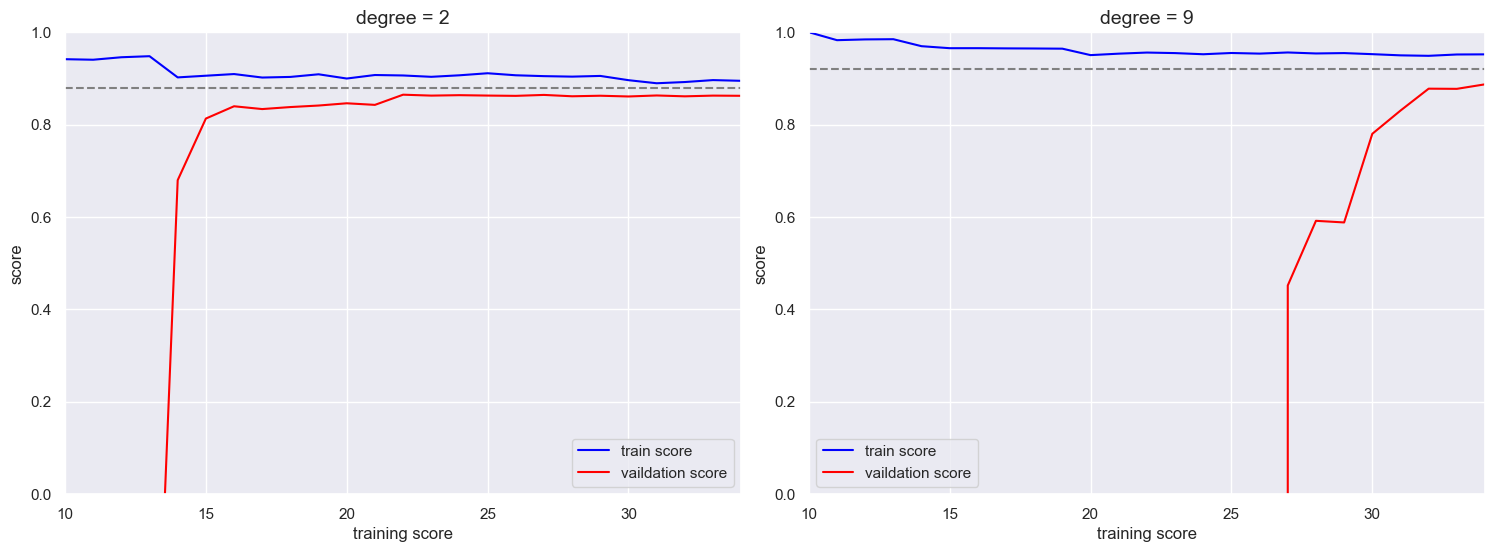

In [16]:
fig ,ax = plt.subplots(1,2,figsize = (16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i,degree in enumerate([2,9]):
    N,train_1c,val_1c = learning_curve(PolynomialRegression(degree),
                                       x,y,cv=7,
                                       train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N,np.mean(train_1c,1),color = 'blue',label = 'train score')
    ax[i].plot(N,np.mean(val_1c,1),color = 'red',label = 'vaildation score')
    ax[i].hlines(np.mean([train_1c[-1],val_1c[-1]]),N[0],N[-1],color = 'gray',linestyle = 'dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training score')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree),size = 14)
    ax[i].legend(loc='best')
    
    

### 格狀搜尋

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False],
              'linearregression__n_jobs': [None, 1, -1],
              'linearregression__positive': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(x, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False],
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [None, 1, -1],
                         'linearregression__positive': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [29]:
grid.best_params_

{'linearregression__copy_X': True,
 'linearregression__fit_intercept': False,
 'linearregression__n_jobs': None,
 'linearregression__positive': False,
 'polynomialfeatures__degree': 4}

In [31]:
model = grid.best_estimator_
print(model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])


(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

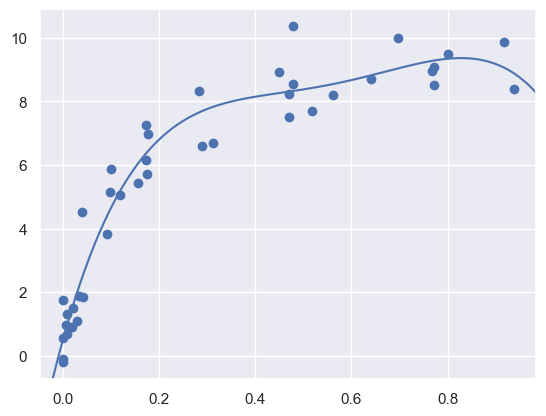

In [33]:
plt.scatter(x.ravel(),y)
lim = plt.axis()
y_test = model.fit(x,y).predict(x_test)
plt.plot(x_test.ravel(),y_test)
plt.axis(lim)